# Bank Customer Churn Prediction-ANN
Description
This dataset contains information about bank customers and their churn status, which indicates whether they have exited the bank or not. It is suitable for exploring and analyzing factors influencing customer churn in banking institutions and for building predictive models to identify customers at risk of churning.

## Exploratory Data Analysis | (EDA)

* Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
import pylab
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# for ANN   

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

* Load Data

In [4]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.size

140000

In [8]:
df.shape

(10000, 14)

 * Drop Columns

In [10]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df.shape

(10000, 11)

* Data Info

In [14]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


* Statistical Summary

In [15]:
# statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


* Count Plot

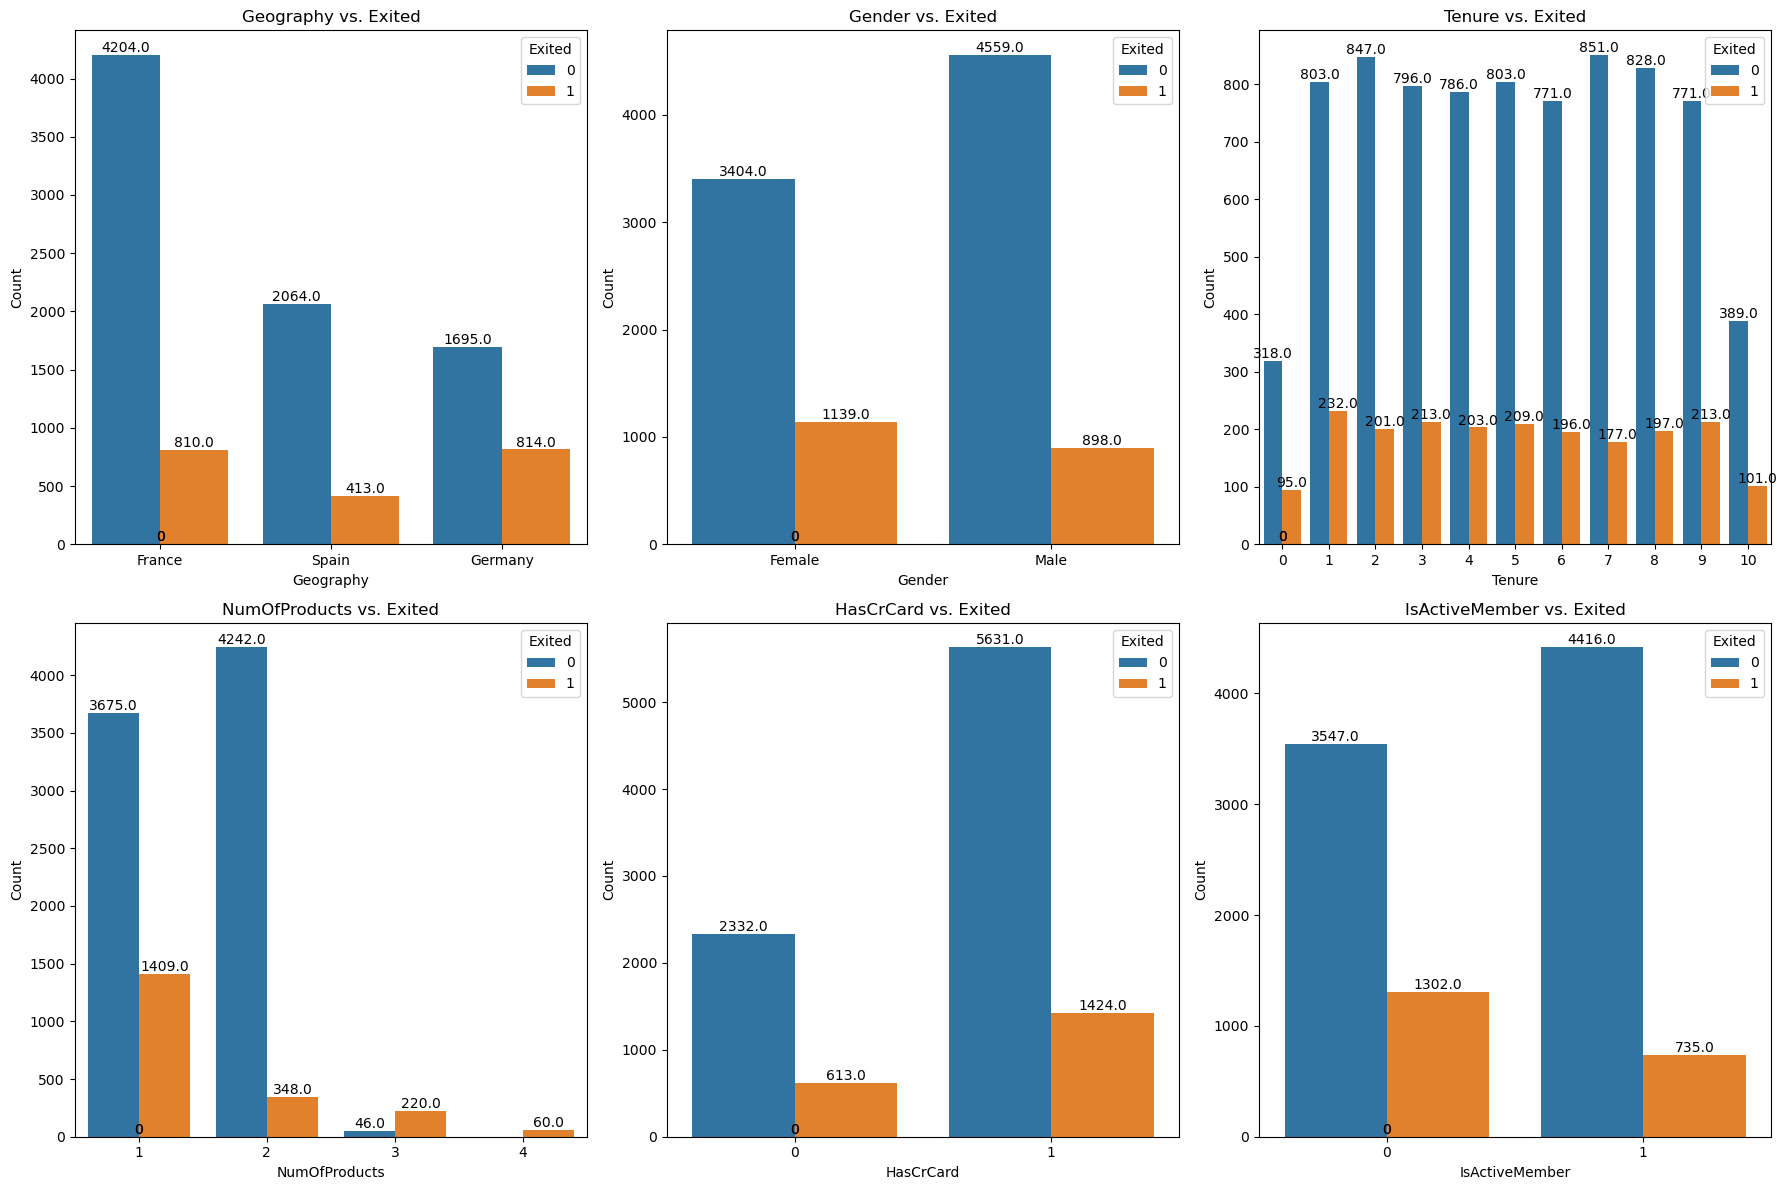

In [16]:
features = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

for ax, feature in zip(axs.flatten(), features):
    sns.countplot(x=feature, hue='Exited', data=df, ax=ax)
    ax.set_title(f'{feature} vs. Exited')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

    # Add values on the bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

In [21]:
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'])
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


* Correlation

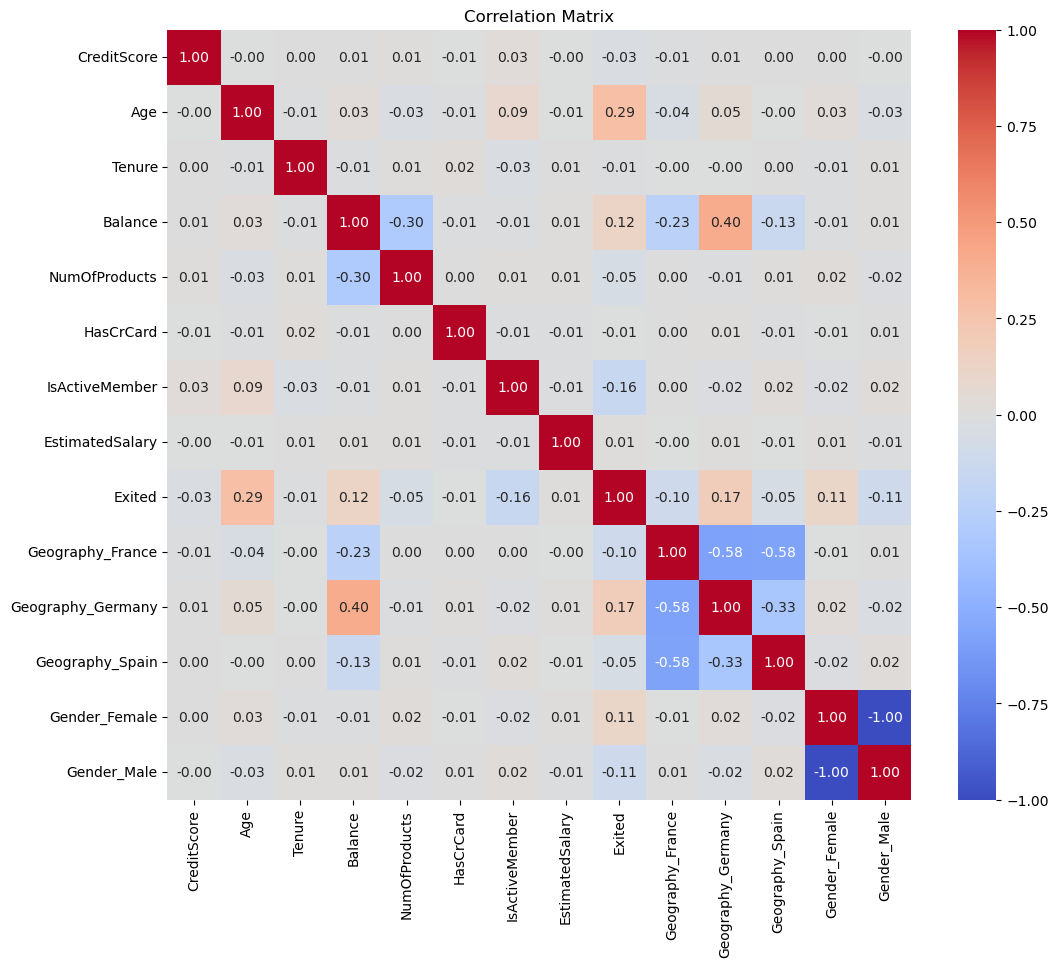

In [22]:
# create correlation plot
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

* Distribution

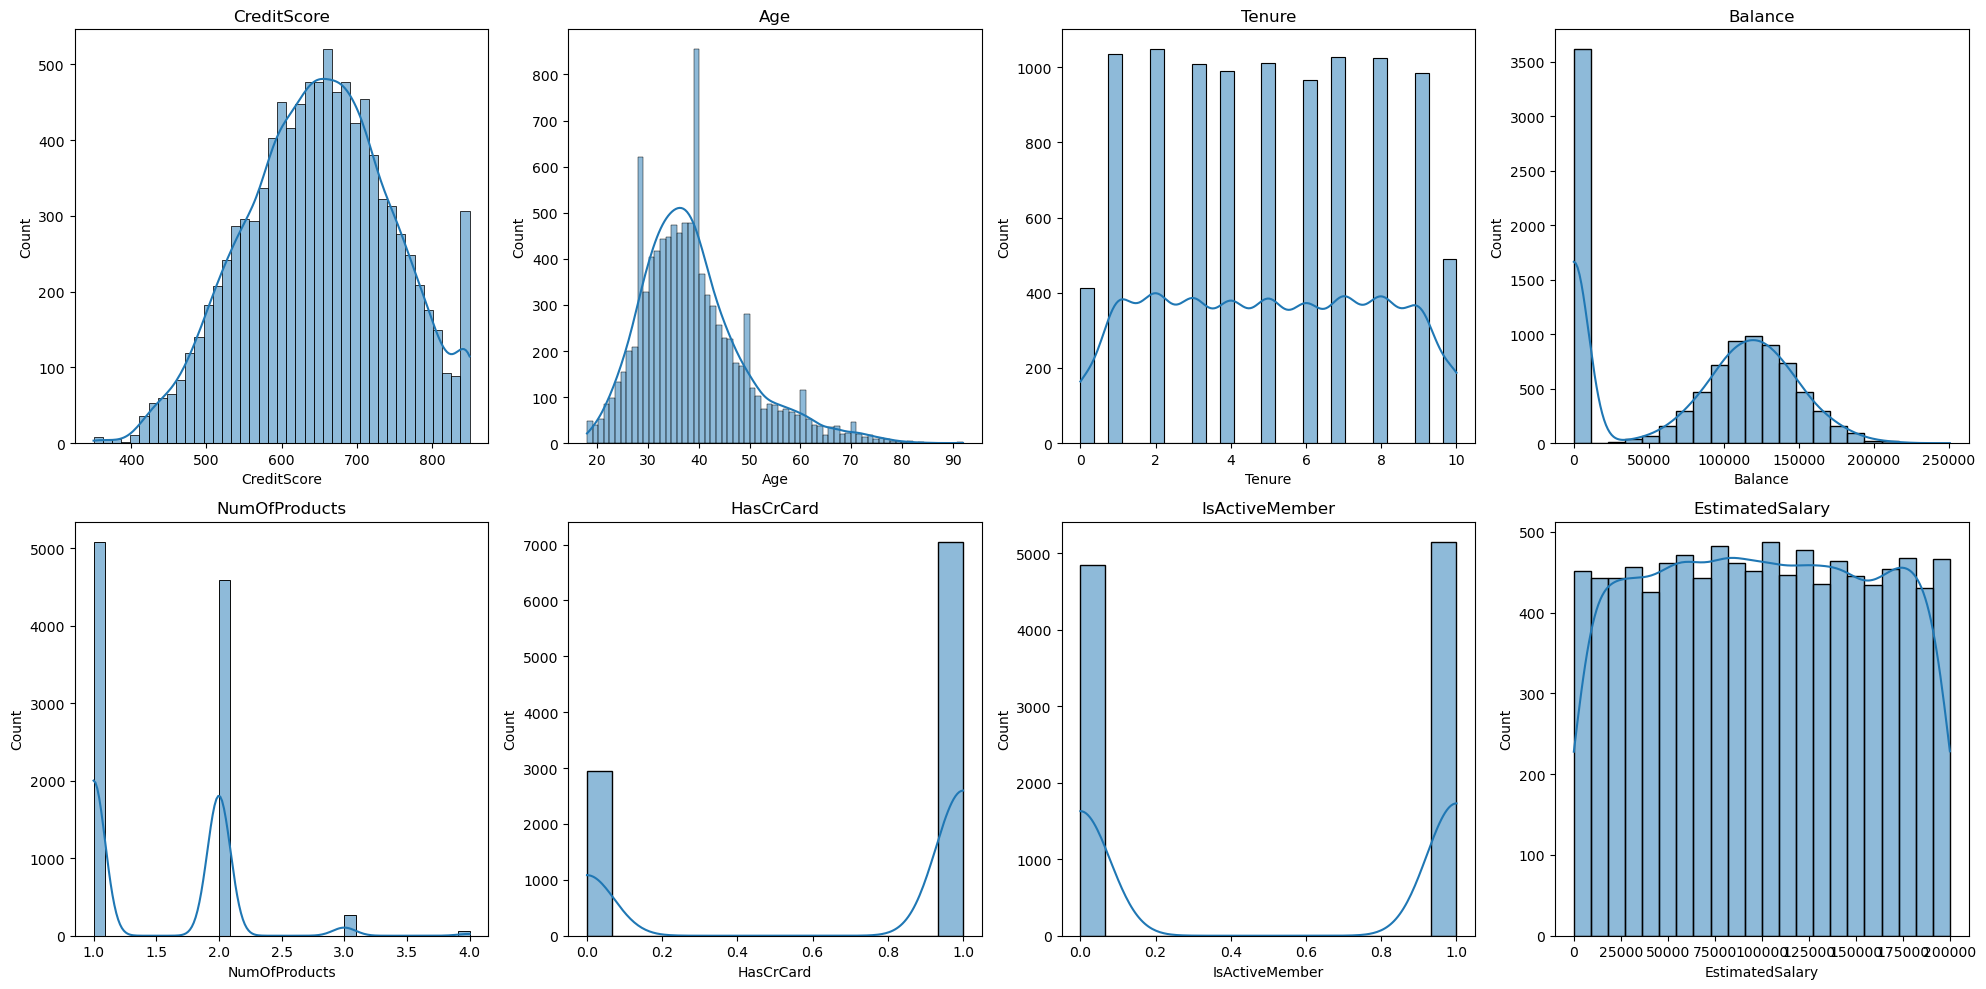

In [23]:
# Create histograms
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# List of variables
variables = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

for ax, var in zip(axes.flatten(), variables):
    sns.histplot(df[var], ax=ax, kde=True)
    ax.set_title(var)

plt.tight_layout()
plt.show()

* Skewness

In [25]:
# print skewnss 
print(df_encoded.skew())
print("Skewness before transformation:")
print(df_encoded['Age'].skew())

# Apply logarithmic transformation (base 10) to the 'Age' variable
# Adding a small constant (1e-9) to avoid log(0) if there are any zero values
df_encoded['Age'] = np.log10(df_encoded['Age'] + 1e-9)

print("Skewness after transformation:")
print(df_encoded['Age'].skew())

CreditScore         -0.071607
Age                  1.011320
Tenure               0.010991
Balance             -0.141109
NumOfProducts        0.745568
HasCrCard           -0.901812
IsActiveMember      -0.060437
EstimatedSalary      0.002085
Exited               1.471611
Geography_France    -0.005601
Geography_Germany    1.149340
Geography_Spain      1.169106
Gender_Female        0.183596
Gender_Male         -0.183596
dtype: float64
Skewness before transformation:
1.0113202630234552
Skewness after transformation:
0.18202011258158898


* Scatter Plot

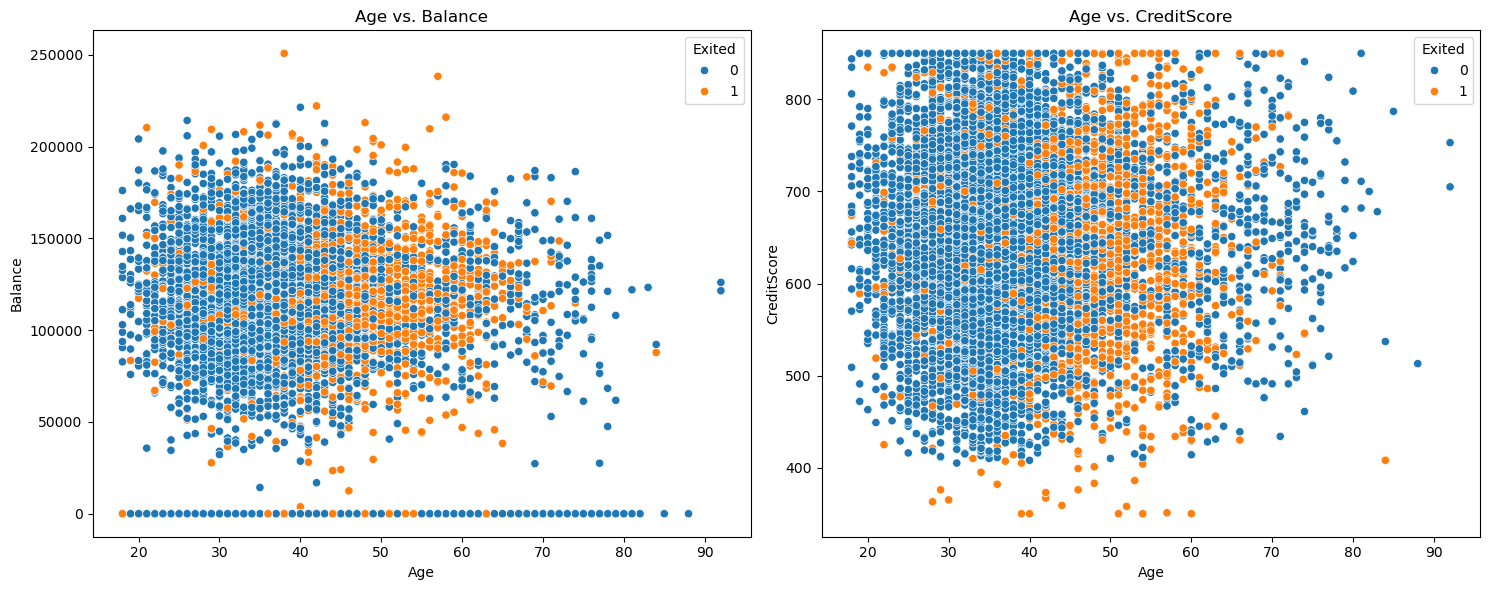

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(x='Age', y='Balance', hue='Exited', data=df, ax=axs[0])
sns.scatterplot(x='Age', y='CreditScore', hue='Exited', data=df, ax=axs[1])

axs[0].set_title('Age vs. Balance')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Balance')
axs[1].set_title('Age vs. CreditScore')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('CreditScore')

plt.tight_layout()
plt.show()

 * Cross Table

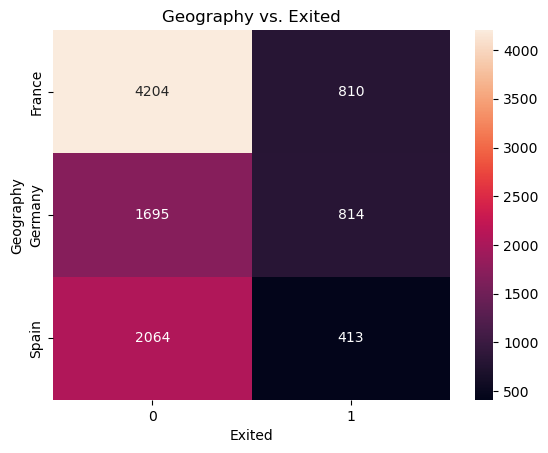

In [28]:
# create cross table
table = pd.crosstab(df['Geography'], df['Exited'])
sns.heatmap(table, annot=True,  fmt='g')
plt.title('Geography vs. Exited')
plt.show()

* Label PLot

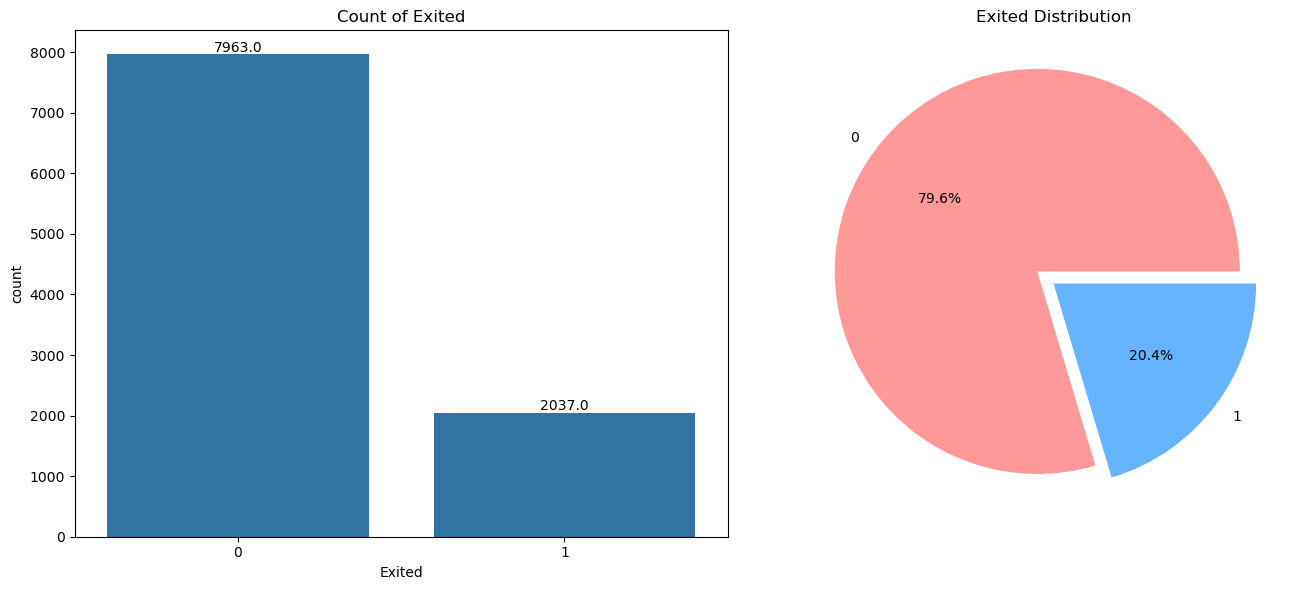

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Count plot with values on bars
sns.countplot(x='Exited', data=df, ax=axs[0])
axs[0].set_title('Count of Exited')
for p in axs[0].patches:
    height = p.get_height()
    axs[0].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Pie chart
exit_counts = df['Exited'].value_counts()
axs[1].pie(exit_counts, labels=exit_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], explode=(0.1, 0))
axs[1].set_title('Exited Distribution')
plt.tight_layout()
plt.show()

* Sampling

In [30]:
df_majority = df[df['Exited'] == 0]
df_minority = df[df['Exited'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,  # Sample with replacement
                                 n_samples=len(df_majority),  # Match the majority class
                                 random_state=42)  # For reproducibility

# Combine the majority class with the upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataset
df= df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

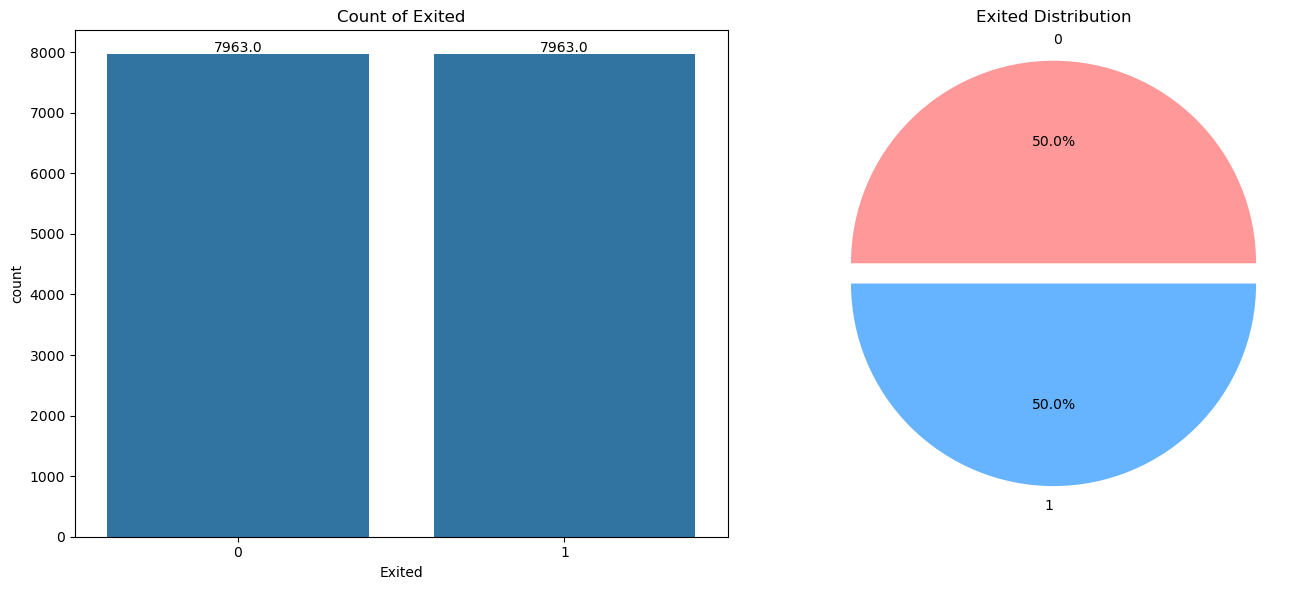

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Count plot with values on bars
sns.countplot(x='Exited', data=df, ax=axs[0])
axs[0].set_title('Count of Exited')
for p in axs[0].patches:
    height = p.get_height()
    axs[0].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Pie chart
exit_counts = df['Exited'].value_counts()
axs[1].pie(exit_counts, labels=exit_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], explode=(0.1, 0))
axs[1].set_title('Exited Distribution')

plt.tight_layout()
plt.show()

## ANN | Model

* Encoding

In [32]:
# onehot on Geography column
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

In [33]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,692,46,2,0.00,2,1,1,105983.09,0,False,True,True
1,516,37,8,113143.12,1,0,0,3363.36,0,False,False,False
2,531,37,1,143407.29,2,0,1,84402.46,0,False,True,True
3,717,36,2,99472.76,2,1,0,94274.72,1,False,False,False
4,737,43,1,125537.38,1,1,0,138510.01,1,True,False,False


* Split Data

In [34]:
# let's split data
X = df.drop(columns=['Exited'])
y = df['Exited']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

 * Scaling Data

In [35]:
from sklearn.preprocessing import StandardScaler
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* Build Model

In [36]:
# Build the model
model = Sequential()
    
    # Input layer + First hidden layer
model.add(Dense(units=352, activation='tanh', input_dim = 11))
model.add(Dropout(0.2))

# Additional hidden layers based on best hyperparameters
model.add(Dense(units=160, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.01))
model.add(Dense(units=384, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.01))
model.add(Dense(units=448, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(units=352, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.34))
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.0))
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.0))
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.0))

    # Output layer
model.add(Dense(units=1, activation='sigmoid'))  # Change to 'softmax' for multi-class classification

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


* Compile Model

In [37]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',  # Change to 'categorical_crossentropy' for multi-class
                  metrics=['accuracy'])

* Train Model

In [39]:
# define early stopping
early_stopping = EarlyStopping( patience=5, restore_best_weights=True)
# Train model
history = model.fit(X_train, y_train,epochs=500,
 validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 1/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.6614 - loss: 0.6456 - val_accuracy: 0.7549 - val_loss: 0.4921
Epoch 2/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7532 - loss: 0.5012 - val_accuracy: 0.7589 - val_loss: 0.4847
Epoch 3/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7530 - loss: 0.5023 - val_accuracy: 0.7809 - val_loss: 0.4580
Epoch 4/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7556 - loss: 0.4977 - val_accuracy: 0.7768 - val_loss: 0.4585
Epoch 5/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7652 - loss: 0.4867 - val_accuracy: 0.7712 - val_loss: 0.4684
Epoch 6/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7752 - loss: 0.4725 - val_accuracy: 0.7790 - val_loss: 0.4578
Epoch 7/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7622 - loss: 0.4866 - val_accuracy: 0.7825 - val_loss: 0.4614
Epoch 8/500
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7668 - loss: 0.4761 - val_ac

* Accuracy Plot

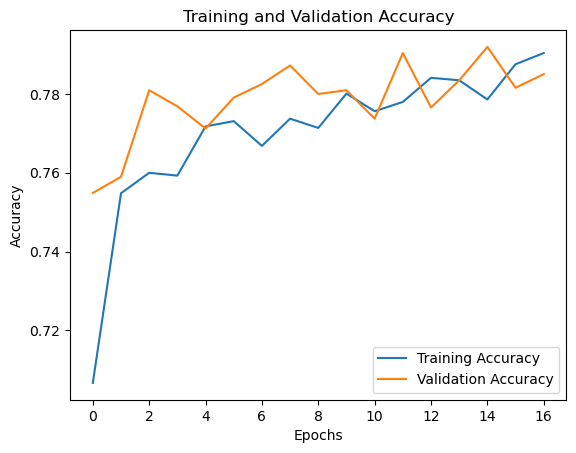

In [40]:
# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
# Add legend to the plot
plt.legend()
# Show the plot
plt.show()

 * Loss Plot

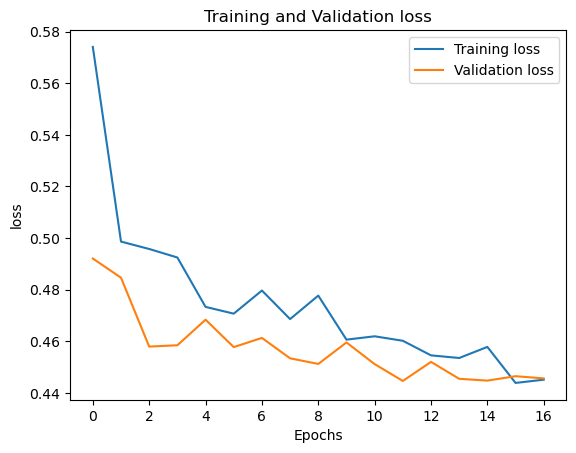

In [41]:
# Plot training accuracy
plt.plot(history.history['loss'], label='Training loss')
# Plot validation accuracy
plt.plot(history.history['val_loss'], label='Validation loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Training and Validation loss')
# Add legend to the plot
plt.legend()
# Show the plot
plt.show()

* Confusion Matrix

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1582
           1       0.78      0.81      0.80      1604

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186



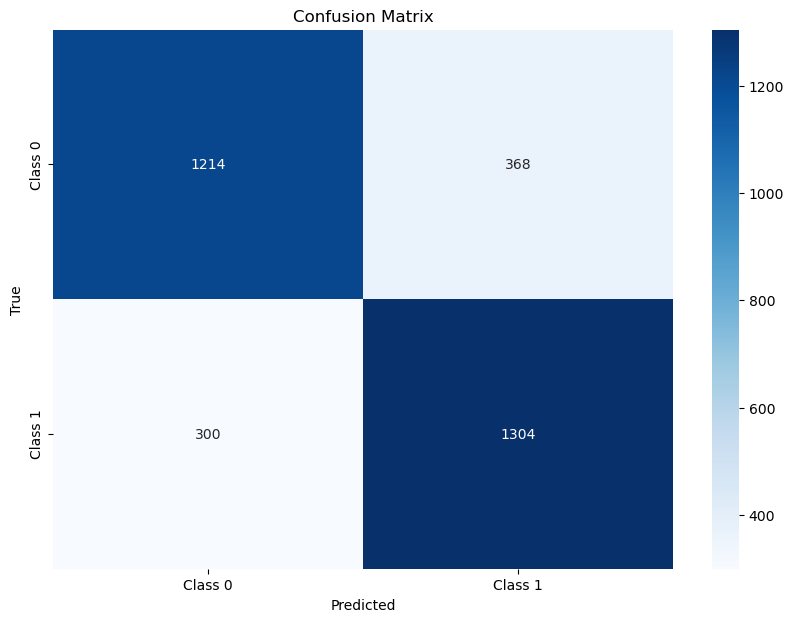

In [42]:
# Predict on test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary class labels

# Print classification report
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# FINISH